# Image Augmentation for Deep Learning (using ImageGenerator)


Data preparation is required when working with neural network and deep learning models. Increasingly data augmentation is also required on more complex object recognition tasks.

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

     1.Sample-wise standardization.
     2.Feature-wise standardization.
     3. ZCA whitening.
     4. Random rotation, shifts, shear and flips.
     5. Dimension reordering.
     6. Save augmented images to disk.

An augmented image generator can be created as follows:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator()

The data generator itself is in fact an iterator, returning batches of image samples when requested. We can configure the batch size and prepare the data generator and get batches of images by calling the **flow()** function.

In [ ]:
X_batch, y_batch = datagen.flow(train, train, batch_size=32)

Finally we can make use of the data generator. Instead of calling the **fit()** function on our model, we must call the **fit_generator()** function and pass in the data generator and the desired length of an epoch as well as the total number of epochs on which to train.

In [ ]:
fit_generator(datagen, samples_per_epoch=len(train), epochs=100)

## Details of ImageGeneratorClass -

Keras has this **ImageDataGenerator** class which allows the users to perform image augmentation on the fly in a very easy way.
The ImageDataGenerator class has three methods **flow(), flow_from_directory() and flow_from_dataframe()** to read the images from a big numpy array and folders containing images.

We will discuss only about **flow_from_directory()** below.

1. Download the train dataset and test dataset, extract them into 2 different folders named as “train” and “test”. The train folder should contain ‘n’ folders each containing images of respective classes. For example, In the Dog vs Cats data set, the train folder should have 2 folders, namely “Dog” and “Cats” containing respective images inside them.

2. Create a validation set, often you have to manually create a validation data by sampling images from the train folder (you can either sample randomly or in the order your problem needs the data to be fed) and moving them to a new folder named “valid”. If the validation set is already provided, you could use them instead of creating them manually.

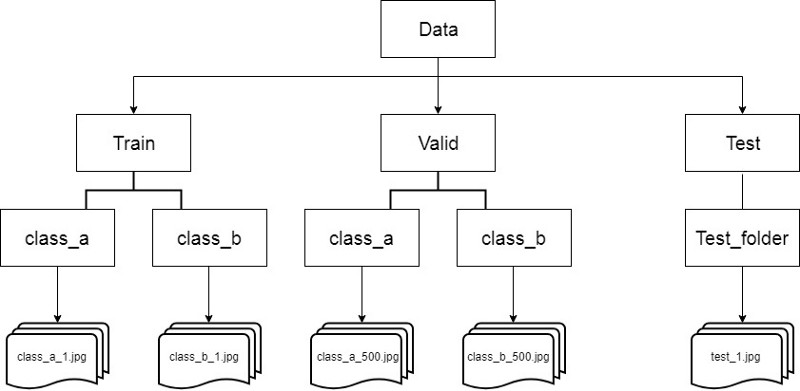

As you can see in the above picture, the test folder also should contain a single folder inside which all the test images are present (Think of it , this is there because the **flow_from_directory()** expects at least one directory under the given directory path.

**IMP -The folder names for the classes are important, name(or rename) them with respective label names so that it would be easy for you later.**

Once you set up the images into the above structure, you are ready to code! Here are the most used attributes along with the **flow_from_directory()** method.

In [ ]:
train_generator = train_datagen.flow_from_directory(directory=r"./train/",target_size=(224, 224),color_mode="rgb",
    batch_size=32,class_mode="categorical",shuffle=True, seed=42)

*  The **directory** must be set to the path where your ‘n’ classes of folders are present.
*  The **target_size** is the size of your input images, every image will be resized to this size.
*  **color_mode**: if the image is either black and white or grayscale set “grayscale” or if the image has three colour channels, set “rgb”.
*   **batch_size**: No. of images to be yielded from the generator per batch.
*   **class_mode**: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
*   **shuffle**: Set True if you want to shuffle the order of the image that is being yielded, else set False.
*   **seed**: Random seed for applying random image augmentation and shuffling the order of the image.

Note: *Validation_generator* is exactly same as *train_generator* except the obvious change of the path of directory

But, the *test_generator* has some changes other than the directory path -
* **batch_size**: Set this to some number that divides your total number of images in your test set exactly.
* **class_mode**: Set this to None, to return only the images.
* **shuffle**: Set this to False, because you need to yield the images in “order”, to predict the outputs and match them with their unique ids or filenames.

## Point of Comparison for Image Augmentation

Now that you know how the image augmentation API in Keras works, let’s look at some examples.

We will use the *MNIST handwritten digit recognition* task in these examples. To begin with, let’s take a look at the first 9 images in the training dataset.

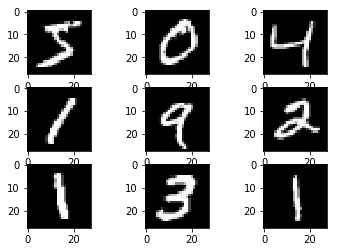

In [6]:
# Plot images
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

### Feature Standardization

It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset.

You can perform feature standardization by setting the *featurewise_center* and *featurewise_std_normalization* arguments on the **ImageDataGenerator** class. These are in fact set to True by default and creating an instance of **ImageDataGenerator** with no arguments will have the same effect.

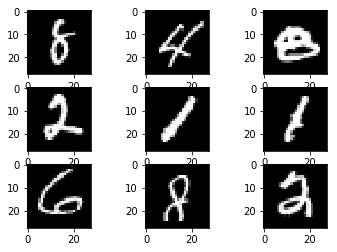

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
# show the plot
    pyplot.show()
    break

### ZCA Whitening

A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images.

Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an alternative called ZCA (learn more in Appendix A of this tech report) shows better results and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals.

You can perform a ZCA whitening transform by setting the *zca_whitening* argument to True.

/home/shreyansh/.local/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


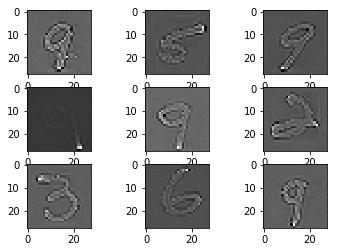

In [8]:
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## Random Rotations

Sometimes images in your sample data may have varying and different rotations in the scene.

You can train your model to better handle rotations of images by artificially and randomly rotating images from your dataset during training.

The example below creates random rotations of the MNIST digits up to 90 degrees by setting the *rotation_range* argument.

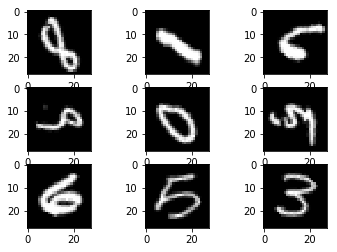

In [9]:
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## Random Shifts

Objects in your images may not be centered in the frame. They may be off-center in a variety of different ways.

You can train your deep learning network to expect and currently handle off-center objects by artificially creating shifted versions of your training data. Keras supports separate horizontal and vertical random shifting of training data by the *width_shift_range* and *height_shift_range* arguments.

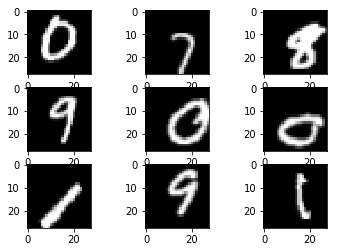

In [10]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## Random Flips

Another augmentation to your image data that can improve performance on large and complex problems is to create random flips of images in your training data.

Keras supports random flipping along both the vertical and horizontal axes using the *vertical_flip* and *horizontal_flip* arguments.

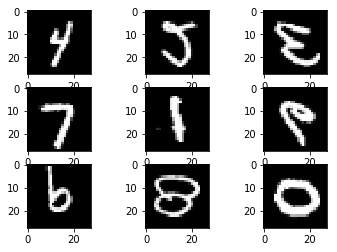

In [11]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

Running this example you can see flipped digits. Flipping digits is not useful as they will always have the correct left and right orientation, but this may be useful for problems with photographs of objects in a scene that can have a varied orientation.

## Saving Augmented Images to File

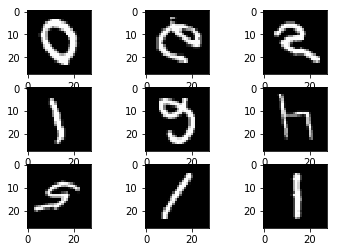

In [13]:
import os
os.makedirs('images') # Creates a new directory called ' images' in which the augmented images will be stored
# This directory is made in the directory from which jupyter notebook was accessed.

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## Advantages of using ImageDataGenerator

 * **Easy to write** — We just have to call keras.preprocessing.image.ImageDataGenerator() and set values for different parameters like horizontal_flip, vertical_flip, rescale, brightness_range, zoom_range, rotation_range etc
* **Less to remember** — We need not manually code cv2 image processing techniques for flipping, varying brightness, zoom etc
 * **Easy to combine** — As seen in the code example, we can easily combine ImageDataGenerator with our custom image generator.
 * **Fast** — If you want to use multiple threads to load training data, Keras ImageDataGenerator.flow() has a workers argument, which can be tuned, thus reducing the training time by orders of magnitude.

## Conclusion

* First and foremost, if the data-set contains images, we should use a generator.
* Next, when the total number of images are less, we need to perform image augmentations to increase our data-set size (in terms of image count).
* And lastly, instead of performing these augmentations ourselves, we should use ImageDataGenerator of Keras because of the above mentioned advantages.